# Загрузка датасета

In [ ]:
import kagglehub
nibinv23_iam_handwriting_word_database_path = kagglehub.dataset_download('nibinv23/iam-handwriting-word-database')

100%|██████████| 1.10G/1.10G [00:19<00:00, 60.5MB/s]

Extracting files...


In [ ]:
nibinv23_iam_handwriting_word_database_path

'/root/.cache/kagglehub/datasets/nibinv23/iam-handwriting-word-database/versions/2'

In [ ]:
images_path = '/root/.cache/kagglehub/datasets/nibinv23/iam-handwriting-word-database/versions/2/iam_words/words/a01/a01-000u'

# Инференс модели TrOCR

https://github.com/spmallick/learnopencv/tree/master/Handwritten_Text_Recognition_using_OCR

Handwritten Text Recognition using OCR
https://learnopencv.com/handwritten-text-recognition-using-ocr/

In [ ]:
from transformers import VisionEncoderDecoderModel, TrOCRProcessor
from PIL import Image
from tqdm import tqdm

import torch
import os
import glob as glob
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

In [ ]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
trained_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-handwritten').to(device)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 1024,
  "decode

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

In [ ]:
def read_and_show(image_path):
    """
    :param image_path: String, path to the input image.

    Returns:
        image: PIL Image.
    """
    image = Image.open(image_path).convert('RGB')
    return image

In [ ]:
def ocr(image, processor, model):
    """
    :param image: PIL Image.
    :param processor: Huggingface OCR processor.
    :param model: Huggingface OCR model.

    Returns:
        generated_text: the OCR'd text string.
    """
    pixel_values = processor(image, return_tensors='pt').pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [ ]:
def eval_new_data(
    data_path=None,
    num_samples=50,
    show_image=False
):
    image_paths = glob.glob(data_path)
    for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
        if i == num_samples and num_samples != -1:
            break
        image = read_and_show(image_path)
        text = ocr(image, processor, trained_model)

        # Save figure
        plt.figure(figsize=(7, 4))
        plt.title(text)
        plt.imshow(image)
        plt.axis('off')
        plt.savefig(os.path.join('pretrained_model_inference', image_path.split('/')[-1]))
        plt.close()  # Close the figure to free up memory

        # Show image if requested
        if show_image:
            plt.figure(figsize=(7, 4))
            plt.title(text)
            plt.imshow(image)
            plt.axis('off')
            plt.show()

  0%|          | 0/52 [00:00<?, ?it/s]

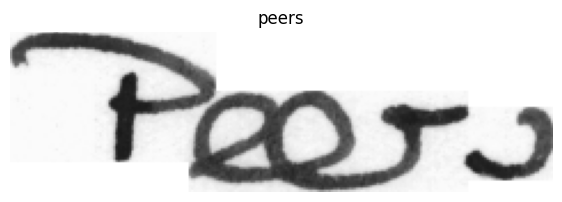

  2%|▏         | 1/52 [00:00<00:22,  2.32it/s]

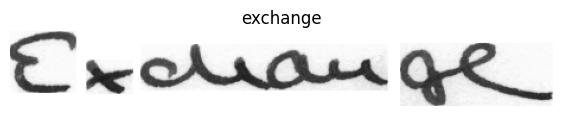

  4%|▍         | 2/52 [00:01<00:30,  1.65it/s]

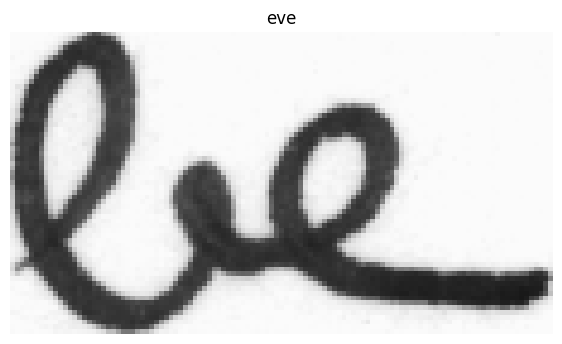

  6%|▌         | 3/52 [00:01<00:31,  1.54it/s]

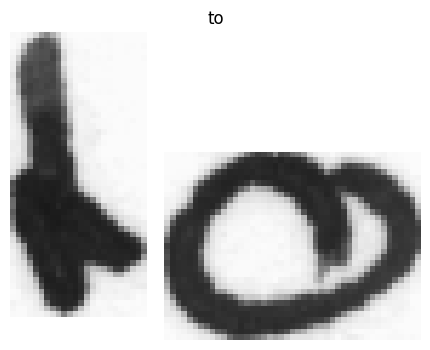

  8%|▊         | 4/52 [00:02<00:33,  1.44it/s]

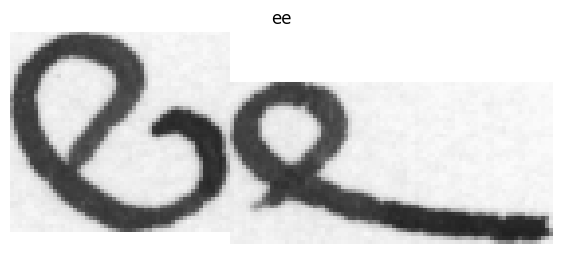

 10%|▉         | 5/52 [00:03<00:32,  1.44it/s]

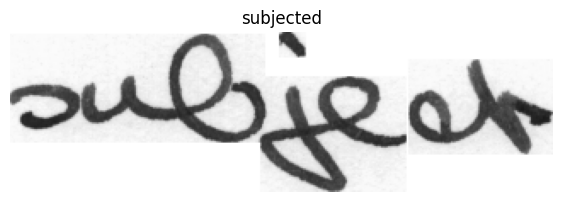

 12%|█▏        | 6/52 [00:04<00:34,  1.35it/s]

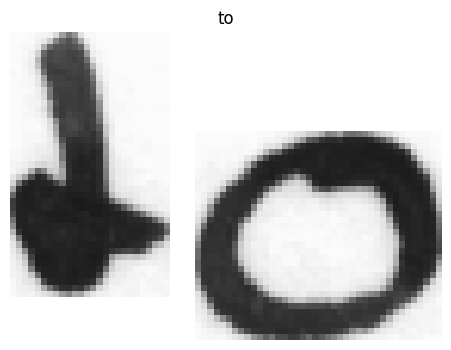

 13%|█▎        | 7/52 [00:04<00:28,  1.57it/s]

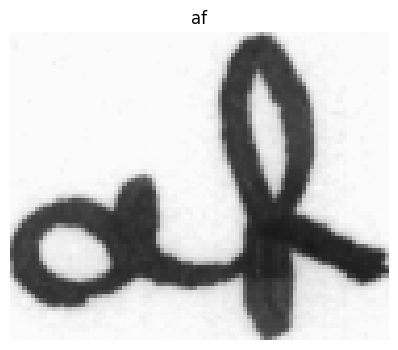

 15%|█▌        | 8/52 [00:05<00:25,  1.71it/s]

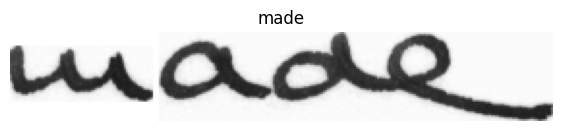

 17%|█▋        | 9/52 [00:05<00:23,  1.85it/s]

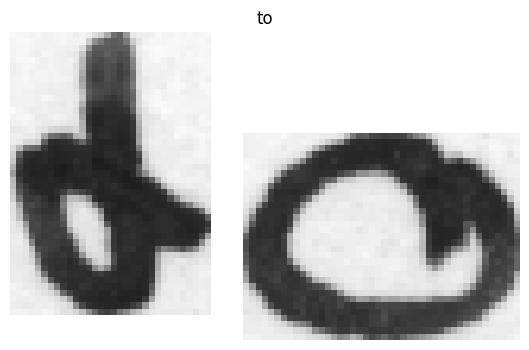

 19%|█▉        | 10/52 [00:05<00:21,  1.93it/s]

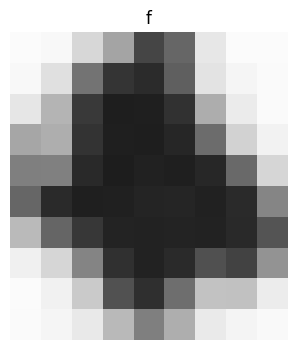

 21%|██        | 11/52 [00:06<00:18,  2.23it/s]

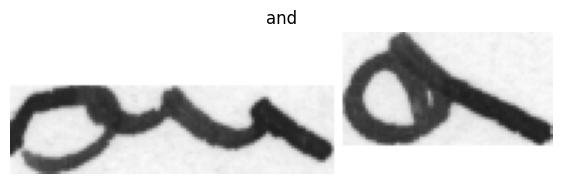

 23%|██▎       | 12/52 [00:06<00:18,  2.17it/s]

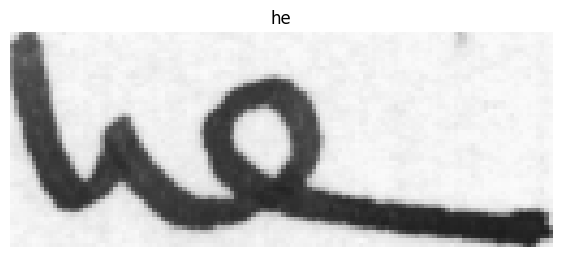

 25%|██▌       | 13/52 [00:07<00:18,  2.06it/s]

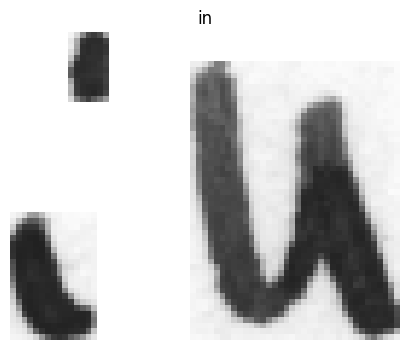

 27%|██▋       | 14/52 [00:07<00:18,  2.11it/s]

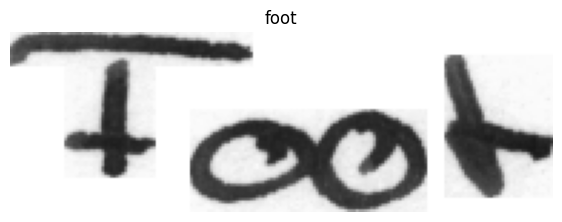

 29%|██▉       | 15/52 [00:08<00:18,  1.96it/s]

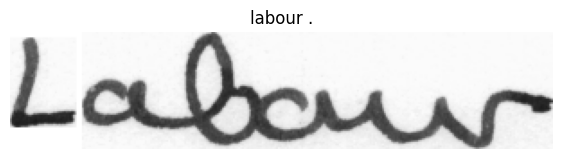

 31%|███       | 16/52 [00:08<00:17,  2.05it/s]

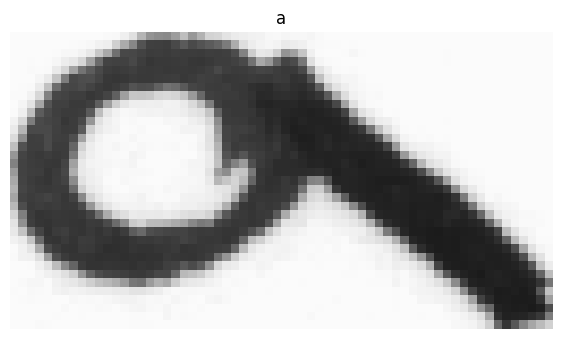

 33%|███▎      | 17/52 [00:09<00:17,  2.02it/s]

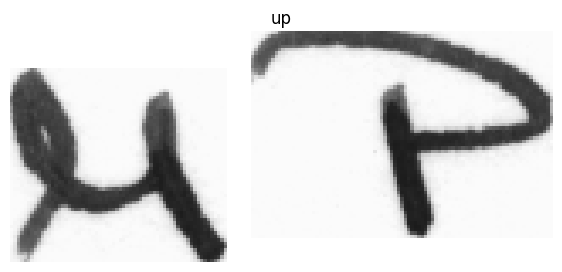

 35%|███▍      | 18/52 [00:09<00:16,  2.12it/s]

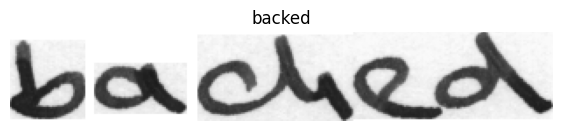

 37%|███▋      | 19/52 [00:10<00:15,  2.12it/s]

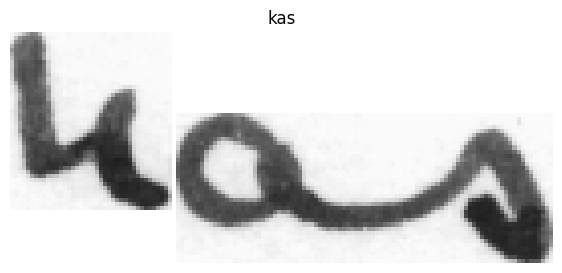

 38%|███▊      | 20/52 [00:10<00:16,  1.96it/s]

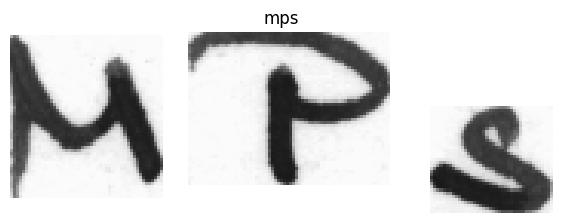

 40%|████      | 21/52 [00:11<00:18,  1.72it/s]

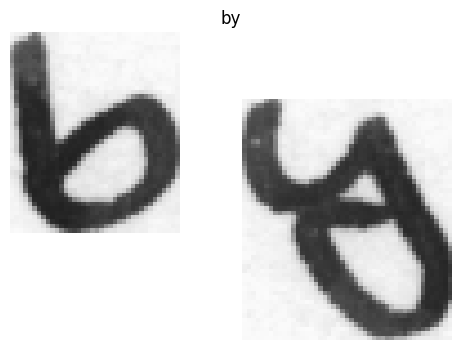

 42%|████▏     | 22/52 [00:12<00:17,  1.74it/s]

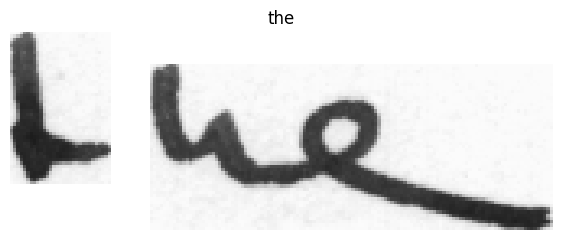

 44%|████▍     | 23/52 [00:12<00:15,  1.87it/s]

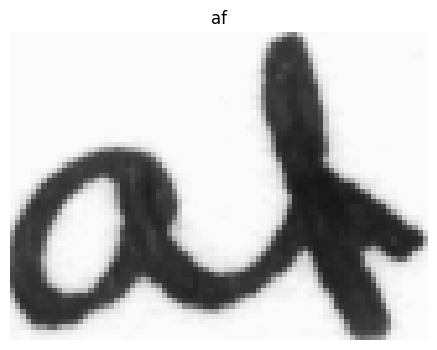

 46%|████▌     | 24/52 [00:13<00:16,  1.68it/s]

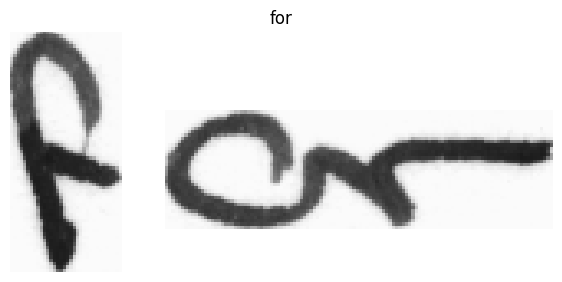

 48%|████▊     | 25/52 [00:14<00:18,  1.48it/s]

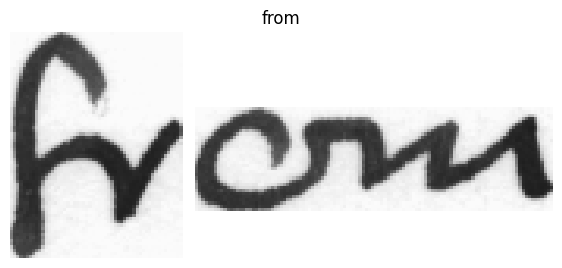

 50%|█████     | 26/52 [00:14<00:16,  1.60it/s]

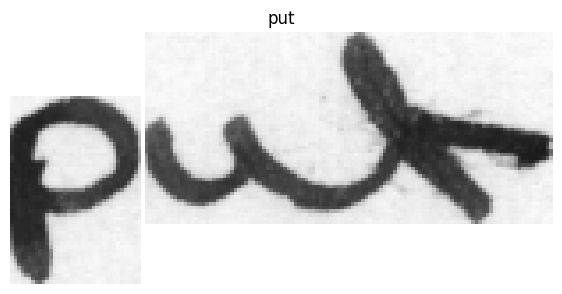

 52%|█████▏    | 27/52 [00:15<00:14,  1.68it/s]

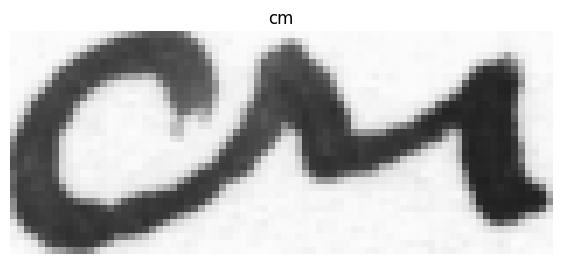

 54%|█████▍    | 28/52 [00:15<00:13,  1.75it/s]

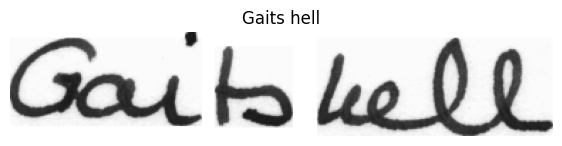

 56%|█████▌    | 29/52 [00:16<00:12,  1.84it/s]

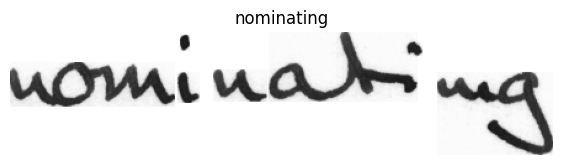

 58%|█████▊    | 30/52 [00:16<00:11,  1.90it/s]

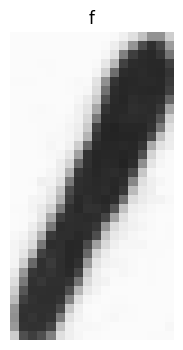

 60%|█████▉    | 31/52 [00:17<00:10,  2.04it/s]

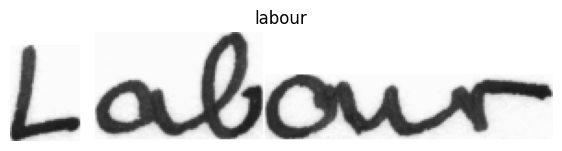

 62%|██████▏   | 32/52 [00:17<00:08,  2.30it/s]

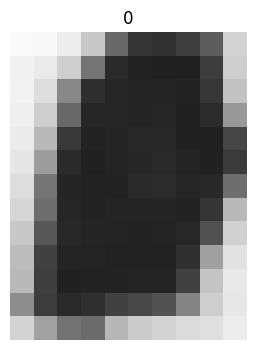

 63%|██████▎   | 33/52 [00:17<00:07,  2.44it/s]

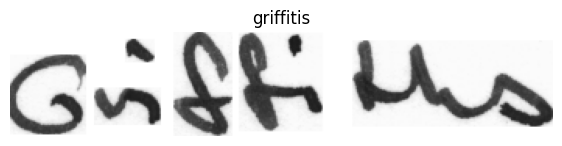

 65%|██████▌   | 34/52 [00:18<00:06,  2.59it/s]

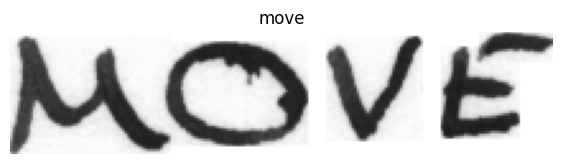

 67%|██████▋   | 35/52 [00:18<00:06,  2.53it/s]

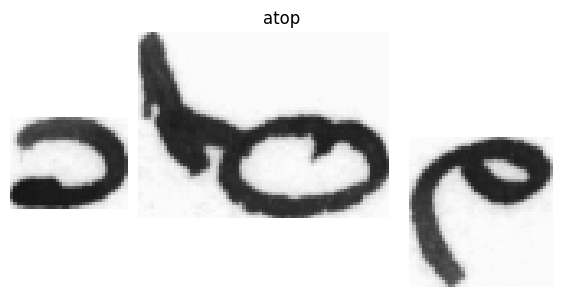

 69%|██████▉   | 36/52 [00:18<00:06,  2.63it/s]

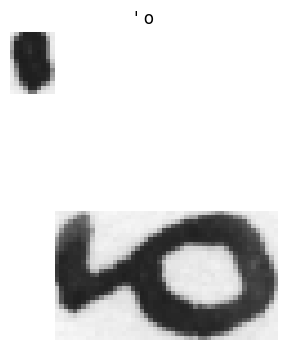

 71%|███████   | 37/52 [00:19<00:05,  2.59it/s]

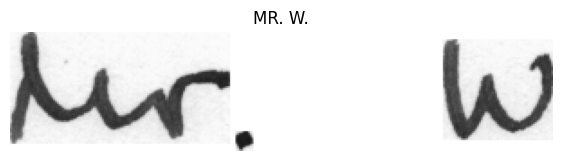

 73%|███████▎  | 38/52 [00:19<00:05,  2.43it/s]

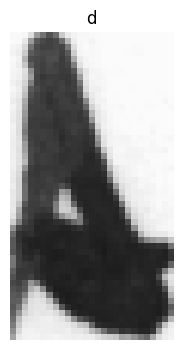

 75%|███████▌  | 39/52 [00:19<00:04,  2.63it/s]

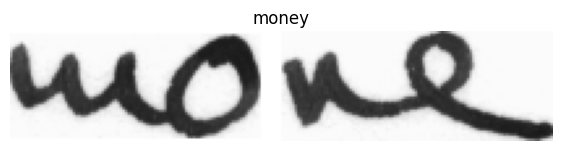

 77%|███████▋  | 40/52 [00:20<00:04,  2.59it/s]

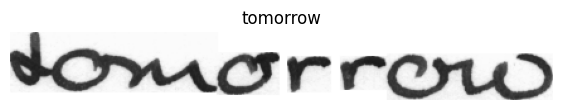

 79%|███████▉  | 41/52 [00:20<00:04,  2.65it/s]

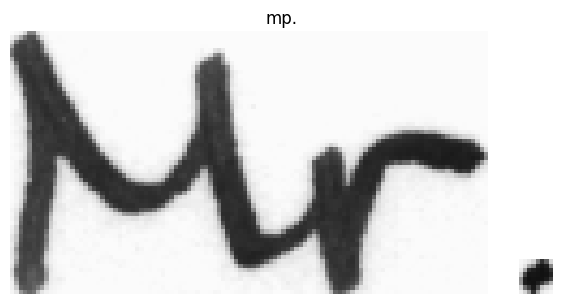

 81%|████████  | 42/52 [00:21<00:03,  2.56it/s]

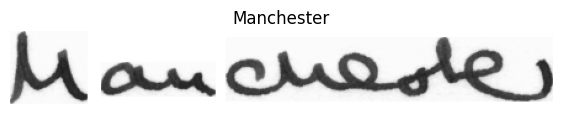

 83%|████████▎ | 43/52 [00:21<00:03,  2.61it/s]

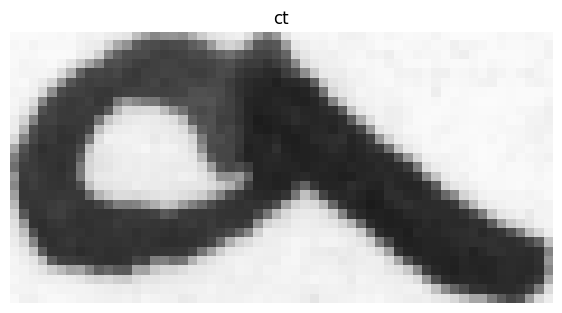

 85%|████████▍ | 44/52 [00:21<00:03,  2.59it/s]

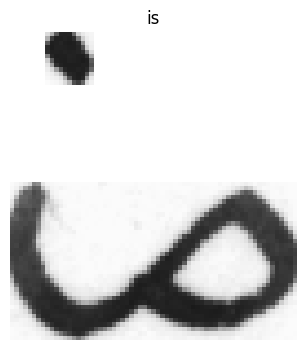

 87%|████████▋ | 45/52 [00:22<00:02,  2.64it/s]

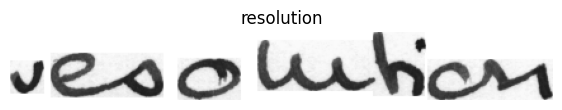

 88%|████████▊ | 46/52 [00:22<00:02,  2.54it/s]

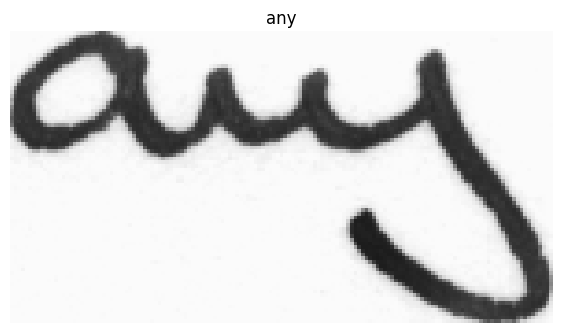

 90%|█████████ | 47/52 [00:23<00:02,  2.34it/s]

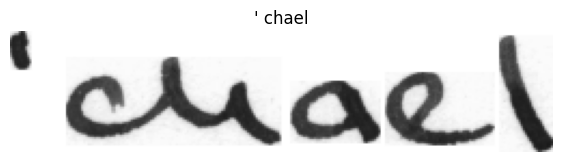

 92%|█████████▏| 48/52 [00:23<00:01,  2.27it/s]

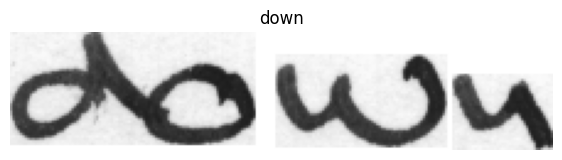

 94%|█████████▍| 49/52 [00:24<00:01,  2.27it/s]

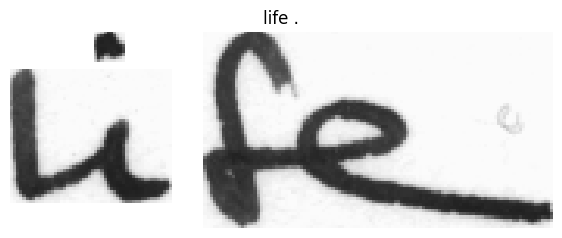

 96%|█████████▌| 50/52 [00:24<00:00,  2.30it/s]

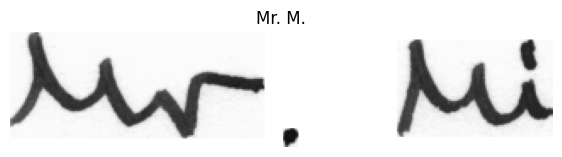

 98%|█████████▊| 51/52 [00:25<00:00,  1.99it/s]

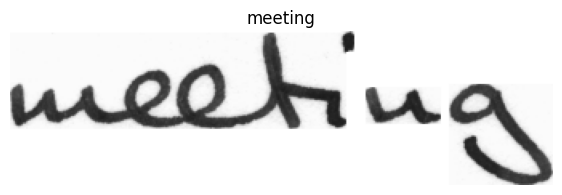

100%|██████████| 52/52 [00:25<00:00,  2.01it/s]


In [ ]:
os.makedirs('pretrained_model_inference', exist_ok=True)

eval_new_data(
    data_path=os.path.join(images_path, '*'),
    num_samples=-1,
    show_image=True
)

# Дальнейшие улучшения

Фактически, мы можем сделать процесс более надежным, выполнив следующие шаги:

OCR для каждого слова в документе не идеален. Гораздо лучше распознавать каждое предложение. Для этого нам нужно обучить надежную модель детектора предложений, например [YOLOv10](https://colab.research.google.com/drive/16jaqxcG1q_B1bgu_y4-VP5-fAe4Br9LX#scrollTo=Fta-lkuRc-va&line=6&uniqifier=1). Это значительно облегчит управление макетом оцифрованного документа.

Мы также можем обучить модель OCR, которая сможет обнаруживать разные языки и переводить их обратно на целевой язык.

На данный момент наша модель не обрабатывает математические и научные символы. Добавление этой функции обеспечит лучший пользовательский опыт.